<a href="https://colab.research.google.com/github/byui-cse/cse480-notebooks/blob/master/12_4_Answer_Selected_Questions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Answer Selected Questions
## 26 March 2021

## 1

Boolean function minimization is a pretty cool topic. Are we going to talk about that?

### Answer

No. There are tools online to help with this, such as [this one](http://tma.main.jp/logic/index_en.html).

We can work through an example, however:

#### A Familiar Function

Let $z_{3}z_{2}z_{1}z_{0}$ be the product of the two-bit integers $x_{1}x_{0}$ and $y_{1}y_{0}$.

|   |   |   |   |
|:-:|:-:|:-:|:-:|
|   |   | 1 | 1 |
|   | x | 1 | 1 |
|   |   |   |   |
|   |   | 1 | 1 |
| + | 1 | 1 |   |
| 1 | 0 | 0 | 1 |

Let d(x) mean the decimal value of x, where x is the 2-bit binary number $x_{1}x_{0}$ --- y and z similarly.

Here's the truth table for this 2-bit multiplication:

| x1 | x0 | y1 | y0 |  d(x) |  d(y) | d(z)  | z3210 | z3 | z2 | z1 | z0 |
|:--:|:--:|:--:|:--:|:-----:|:-----:|:-----:|:-----:|:--:|:--:|:--:|:--:|
|  0 |  0 |  0 |  0 |     0 |     0 |     0 |  0000 |  0 |  0 |  0 | 0  |
|  0 |  0 |  0 |  1 |     0 |     1 |     0 |  0000 |  0 |  0 |  0 | 0  |
|  0 |  0 |  1 |  0 |     0 |     2 |     0 |  0000 |  0 |  0 |  0 | 0  |
|  0 |  0 |  1 |  1 |     0 |     3 |     0 |  0000 |  0 |  0 |  0 | 0  |
|  0 |  1 |  0 |  0 |     1 |     0 |     0 |  0000 |  0 |  0 |  0 | 0  |
|  0 |  1 |  0 |  1 |     1 |     1 |     1 |  0001 |  0 |  0 |  0 | 1  |
|  0 |  1 |  1 |  0 |     1 |     2 |     2 |  0010 |  0 |  0 |  1 | 0  |
|  0 |  1 |  1 |  1 |     1 |     3 |     3 |  0011 |  0 |  0 |  1 | 1  |
|  1 |  0 |  0 |  0 |     2 |     0 |     0 |  0000 |  0 |  0 |  0 | 0  |
|  1 |  0 |  0 |  1 |     2 |     1 |     2 |  0010 |  0 |  0 |  1 | 0  |
|  1 |  0 |  1 |  0 |     2 |     2 |     4 |  0100 |  0 |  1 |  0 | 0  |
|  1 |  0 |  1 |  1 |     2 |     3 |     6 |  0110 |  0 |  1 |  1 | 0  |
|  1 |  1 |  0 |  0 |     3 |     0 |     0 |  0000 |  0 |  0 |  0 | 0  |
|  1 |  1 |  0 |  1 |     3 |     1 |     3 |  0011 |  0 |  0 |  1 | 1  |
|  1 |  1 |  1 |  0 |     3 |     2 |     6 |  0110 |  0 |  1 |  1 | 0  |
|  1 |  1 |  1 |  1 |     3 |     3 |     9 |  1001 |  1 |  0 |  0 | 1  |

##### Analysis

$z_{0} = (x_{0}y_{0})$, and \\
$z_3 = (x_{0}x_{1}y_{0}y_{1})$.

Those are the easy ones.

$z_{1}$ is a 1 if one, but not both, of the products $(x_{0}y_{1})$ and $(x_{1}y_{0})$ are 1.

So, $z_{1} = ((x_{0}y_{1})+(x_{1}y_{0}))\text{~}(x_{0}x_{1}y_{0}y_{1})$.

Similarly,

$z_{2} = (x_{1}y_{1}(\text{~}x_{0}+\text{~}y_{0}))$.

Not so easy!

Let \\
$x_{0} =$ a, \\
$x_{1} =$ b, \\
$y_{0} =$ c, \\
$y_{1} =$ d. \\
Then \\
$z_{1} =$ ((ad)+(bd))\~(abcd), and \\
$z_{2} =$ (bd(\~a+\~c)).

\~abc + bc\~d + a\~bd + a\~cd

$z_{1}$ minimized DNF = \\
$(\text{~}x_{0}x_{1}y_{0})+(x_{1}y_{0}\text{~}y_{1})+(x_{0}\text{~}x_{1}y_{1})+(x_{0}\text{~}y_{0}y_{1})$.

\~abd + b\~cd

$z_{2}$ minimized DNF = \\
$(\text{~}x_{0}x_{1}y_{1})+(x_{1}\text{~}y_{0}y_{1})$.

###### Try the Brute Force SAT Solver

In [ ]:
vars = ['x1', 'x0', 'y1', 'y0']
vardict = dict(zip(vars, [0]*len(vars)))

In [ ]:
import functools, math, operator, sys
if sys.version_info >= (3, 8):
  product = math.prod
else:
  product = functools.partial(functools.reduce, operator.mul)

def make_literal(name):
  name_l = name.lower()
  globals()[name_l] = name_l
  name_u = name.upper()
  globals()[name_u] = name_u
  return (name_l, name_u)

def init_literals():
  global vardict
  return list(map(make_literal, vardict.keys()))

def set_vars(var_assignments_str):
  """Take a string of the form 'a=1 b=0' to update
     the vardict.
  """
  global vardict
  for var_assignment in var_assignments_str.split():
    var, val = var_assignment.split('=')
    vardict[var] = int(val)

def setv(var, val):
  global vardict
  vardict[var] = val
  return f'{var}={val}'

def assign_vars(n):
  """Assign vars in vardict according to
     to the binary representation of n.

     assign_vars(0) will set all vars to 0.

     assign_vars(63) will set all 6 vars (2^6 - 1 = 63) to 1.
  """
  bits = bin(n)[::-1]
  l = len(bits)
  seen_b = False
  vars = list(vardict.keys())
  vars.reverse()
  for i, var in enumerate(vars):
    if i < l:
      bit = bits[i]
    if bit == 'b':
      seen_b = True
    setv(var, 0 if seen_b else int(bit))

def getv(var):
  """Get the value of var, returns the value of var in vardict (0 or 1).
  """
  global vardict
  varl = var.lower()
  return vardict[var] if var == varl and var in vardict else 1 - getv(varl)

def flip(var):
  """Flip (invert) the value of a literal, to turn a 0 into a 1
     and a 1 into a 0.
  """
  vardict[var] = 0 if getv(var) else 1

def eval_cnf(formula):
  vals = [list(map(getv, clause)) for clause in formula]
  return 1 if product(map(sum, vals)) else 0

def eval_dnf(formula):
  vals = [list(map(getv, clause)) for clause in formula]
  return 1 if sum(map(product, vals)) else 0

def get_satisfying_assignments(formula, first_only=False):
  global vardict
  all_satisfying_assignments = []
  l = 2 ** len(vardict.keys())
  for n in range(l):
    assign_vars(n)
    if eval_cnf(formula):
      if first_only:
        return vardict.copy()
      else:
        all_satisfying_assignments.append(vardict.copy())
  return None if first_only else all_satisfying_assignments

def get_personality(formula, cnf=False):
  global vardict
  l = 2 ** len(vardict.keys())
  personality = []
  for n in range(l):
    assign_vars(n)
    personality.append(eval_cnf(formula) if cnf else eval_dnf(formula))
  return personality

In [ ]:
vardict

In [ ]:
init_literals()

In [ ]:
z0 = ((x0, y0),)
z1 = ((X0, x1, y0), (x1, y0, Y1), (x0, X1, y1), (x0, Y0, y1))
z2 = ((X0, x1, y1), (x1, Y0, y1))
z3 = ((x0, x1, y0, y1),)

In [ ]:
get_personality(z0)

In [ ]:
get_personality(z1)

In [ ]:
get_personality(z2)

In [ ]:
get_personality(z3)

## 2

From page 274 on how BDD hides the exponential growth of truth tables,

> Here, we exploit the fact that in a directed graph with node sharings, even though there are a polynomial number of nodes, there are an exponential number of paths with each path spelling out a truth-table row. Even though the number of paths is exponential, due to the node sharings, we "forget" which path is taken to reach particular states. This helps us to represent BDDs such as an N-input Xor with linear size.

Does this just mean we don’t care about recording the path an input takes through the BDD?

### Answer

From Ganesh:

Often that is the case. XORs are such "forgetful functions".

For example, if 3 vars x0 x1 x2 are all 1's or if one var x0 is a 1 and two vars x1 x2 are both 0's, we reach the same node.

x0 xor x1 xor x2 = 1 when all are 1.

x0 xor x1 xor x2 = 1 even when x0 alone is a 1.

Thus BDDs "forget" equivalent combos.

Thus, all the truth-table "rows" are in a sense present in the "braided hair" style BDD of an XOR. But BDDs cleverly express them in a matter of a poly number of nodes.

## 3

From page 276:
> Bryant proposed a hash-table based representation for BDDs in such a way that isomorphic BDDs map into the same hash-table slot. This way, one can perform Boolean function comparisons in constant time. Also Bryant introduced the Apply operation that takes two BDDs and combines them using a Boolean operator. This operator is polynomial with respect to the sizes of the constituent BDDs. Thus if we can build polynomially sized BDDs, Boolean reasoning using BDDs can be done in polynomial time.

Does this mean that ALL BDDs have been accounted for by this hashing algorithm? If we know the algorithm we can (in constant time) get the results of any input? Does that mean this BDD hash table has (in each hash) a list of "answers" for any input?

### Answer

From Ganesh again:

Yes, BDDs are mega fun and hashing is the trick to map equivalent BDD functions to the same node!

## 4

From page 277:
> Measures such as *dynamic reordering* of the variables are often able to minimize [many] bloated BDDs. Such *sifting* algorithms have been well studied in the literature.

Can you give us an example of this?

### Answer

Also from Ganesh:

Yes, try entering the BDD of a function using the "bad" BDD order in Tyler's tool (take an exp ordered BDD from the book and key it in).

Then click "reorder". It will reorder the vars automagically to a clean order. Suddenly the BDD will slim down -- even quicker than with "Ultra Slim Fast" :-)

## 5

In the book, when talking about minimal DFA and BDDs compared to truth-tables, it says "for larger functions, with the right decoding order of the variables, BDDs (and minimal DFA) can be far more compact." Does this mean that there are also times when minimal DFA and BDDs are just as large as truth tables? Is it possible for the minimal DFA or BDD to be less compact than a truth table?

### Answer

Also from Ganesh again:

Yes. For example, for the function that represents the multiplication function (direct multiplication of two N-bit words). I.e., $x_{n} x_{n-1} x_{n-2} \cdots x_{2} x_{1} x_{0}$ TIMES $y_{n} y_{n-1} y_{n-2} \cdots y_{2} y_{1} y_{0}$.

The outputs are $z_{2n+1} z_{2n} z_{2n-1}\cdots z_{2} z_{1} z_{0}$, take any of the outputs close to $z_{n}$. They will have an exp sized BDD under them.

## 6

You said you might show us how to find the shortest path in the USA graph using BDDs. Will you, please?

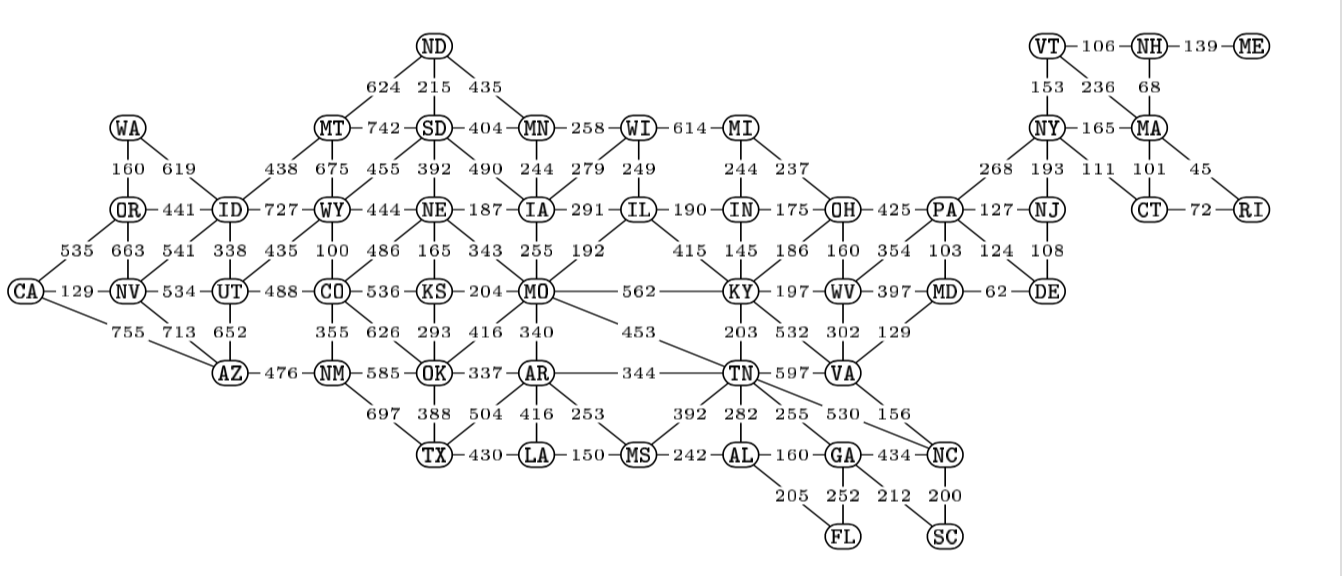

### Answer

Not exactly. But try [graphillion](https://github.com/takemaru/graphillion) on for size!

In [ ]:
!pip install graphillion

In [ ]:
wlinks = [('CA', 'NV', 129),
          ('CA', 'OR', 535),
          ('CA', 'AZ', 755),
          ('WA', 'OR', 160),
          ('WA', 'ID', 619),
          ('OR', 'ID', 441),
          ('OR', 'NV', 663),
          ('NV', 'ID', 541),
          ('NV', 'UT', 534),
          ('NV', 'AZ', 713),
          ('ID', 'MT', 438),
          ('ID', 'WY', 727),
          ('ID', 'UT', 338),
          ('UT', 'WY', 435),
          ('UT', 'CO', 488),
          ('UT', 'AZ', 652),
          ('AZ', 'NM', 476),
          ('MT', 'ND', 624),
          ('MT', 'SD', 742),
          ('MT', 'WY', 675),
          ('WY', 'SD', 455),
          ('WY', 'NE', 444),
          ('WY', 'CO', 100),
          ('CO', 'NE', 486),
          ('CO', 'KS', 536),
          ('CO', 'OK', 626),
          ('CO', 'NM', 355),
          ('NM', 'OK', 585),
          ('NM', 'TX', 697),
          ('ND', 'MN', 435),
          ('ND', 'SD', 215),
          ('SD', 'MN', 404),
          ('SD', 'IA', 490),
          ('SD', 'NE', 392),
          ('NE', 'IA', 187),
          ('NE', 'MO', 343),
          ('NE', 'KS', 165),
          ('KS', 'MO', 204),
          ('KS', 'OK', 293),
          ('OK', 'MO', 416),
          ('OK', 'AR', 337),
          ('OK', 'TX', 388),
          ('TX', 'AR', 504),
          ('TX', 'LA', 430),
          ('MN', 'WI', 258),
          ('MN', 'IA', 244),
          ('IA', 'WI', 279),
          ('IA', 'IL', 291),
          ('IA', 'MO', 255),
          ('MO', 'IL', 192),
          ('MO', 'KY', 562),
          ('MO', 'TN', 453),
          ('MO', 'AR', 340),
          ('AR', 'TN', 344),
          ('AR', 'MS', 253),
          ('AR', 'LA', 416),
          ('LA', 'MS', 150),
          ('WI', 'MI', 614),
          ('WI', 'IL', 249),
          ('IL', 'IN', 190),
          ('IL', 'KY', 415),
          ('MS', 'TN', 392),
          ('MS', 'AL', 242),
          ('MI', 'OH', 237),
          ('MI', 'IN', 244),
          ('IN', 'OH', 175),
          ('IN', 'KY', 145),
          ('KY', 'OH', 186),
          ('KY', 'WV', 197),
          ('KY', 'VA', 532),
          ('KY', 'TN', 203),
          ('TN', 'VA', 597),
          ('TN', 'NC', 530),
          ('TN', 'GA', 255),
          ('TN', 'AL', 282),
          ('AL', 'GA', 160),
          ('AL', 'FL', 205),
          ('OH', 'PA', 425),
          ('OH', 'WV', 160),
          ('WV', 'PA', 354),
          ('WV', 'MD', 397),
          ('WV', 'VA', 302),
          ('VA', 'MD', 129),
          ('VA', 'NC', 156),
          ('GA', 'NC', 434),
          ('GA', 'SC', 212),
          ('GA', 'FL', 252),
          ('SC', 'NC', 200),
          ('PA', 'NY', 268),
          ('PA', 'NJ', 127),
          ('PA', 'DE', 124),
          ('PA', 'MD', 103),
          ('MD', 'DE', 62),
          ('VT', 'NH', 106),
          ('VT', 'MA', 236),
          ('VT', 'NY', 153),
          ('NY', 'MA', 165),
          ('NY', 'CT', 111),
          ('NY', 'NJ', 193),
          ('NJ', 'DE', 108),
          ('NH', 'ME', 139),
          ('NH', 'MA', 68),
          ('MA', 'RI', 45),
          ('MA', 'CT', 101),
          ('CT', 'RI', 72)]

from graphillion import GraphSet
from pprint import pprint
GraphSet.set_universe(wlinks)
start = 'WA'
goal = 'ME'
paths = GraphSet.paths(start, goal)
print(f'Total number of paths from {start} to {goal}: {len(paths)}')
hamilton_paths = GraphSet.paths(start, goal, is_hamilton=True)
print(f'Total number of Hamilton paths from {start} to {goal}: {len(hamilton_paths)}')
for path in hamilton_paths.min_iter():
  minimum_length_path = path
  break
print('The miminum-length path is:')
pprint(minimum_length_path)
length_of_minimum_length_path = sum(map(lambda link: GraphSet._weights[link], minimum_length_path))
print(f'The total length of this path is {length_of_minimum_length_path} miles.')

## 7

What's it like to collaborate with Ganesh?!

### Answer

Would you like to find out?

#### If so...

There is a program called "Distributed Undergrad REU" (or DREW) that enables UGs from a school like BYU Idaho to work with someone like me.

https://cra.org/cra-wp/dreu/

If you have a good UG who is considering (or could be tempted) to do a PhD, then please ask him/her to consider this program. It is quite competitive but gives the students [a great opportunity] -- and maybe open their eyes to do a PhD.